In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Spatial BBS on N x [0, L] 

In [11]:
def ini_config(shape=[1, 10], p=0.3):
    X = np.zeros(shape=shape)
    for i in np.arange(shape[0]):
        for j in np.arange(shape[1]):
            if np.random.rand()<p:
                X[i,j] = 1
    return X

In [37]:
def Spatial_Carrier_Action(X, Carrier, eps=0):
    '''
    [X, Carrier] --> [X_new, Carrier_new]
    X.shape = Carrier.shape = [L,0] 
    Impose periodic boundary condition on the underlying graph [0,L]
    eps = failure probability for randomization 
    '''
    L = X.shape[0]
    X_new = X.copy()
    Carrier_new = Carrier.copy()
    for i in np.arange(L):
        # carrier picking up balls
        if X[i]>0: # site i has ball in config X
            U = np.random.rand()
            if U>eps:
                Carrier_new[i] += X[i]
                X_new[i] = 0
                
        # carrier dropping balls
        elif (Carrier[i]>0) and (X[i]==0) and (X[(i+1) % L]==0) and (X[(i-1) % L]==0):
            U1 = np.random.rand()
            if U1>eps:
                X_new[i] = 1
                Carrier_new[i] -= 1
            
    return X_new, Carrier_new

In [38]:
def SBBS_update_single(X, eps=0): 
    '''
    X = array of shape [L, n]
    ''' 
    X = np.hstack((X, np.zeros(shape=X.shape, dtype=int)))
    Carrier = np.zeros(shape=[X.shape[0],])
    X_new = []
    Carrier_process = []
    for i in np.arange(X.shape[1]):
        if (np.sum(X[:,i:])==0) and (np.sum(Carrier)==0):
            # no more balls to the right and carrier is empty
            break
        
        W = X[:,i]
        W_new, Carrier = Spatial_Carrier_Action(W, Carrier, eps)
        X_new.append(W_new)
        Carrier_process.append(Carrier)
    return np.asarray(X_new).T, np.asarray(Carrier_process).T

In [39]:
def SBBS_update(X, n_iter=1, eps=0):
    for i in np.arange(n_iter):
        X, Carrier_process = SBBS_update_single(X, eps)
    return X, Carrier_process

In [50]:
p_list = [0.3, 0.6]
X_list = []
for p in p_list:
    X = ini_config(shape=[200,20], p=p) # shape = [L, n]
    X_list.append(X)
    
# Phase transition at p=0.5, p \approx 0.7
# p<0.5 : subcritical with log n soliton length 
# p=0.5 : critical with \sqrt{n} soliton length
# 0.5<p<0.7 : supercritical with n soliton length but not giant 
# 0.7<p : ultracritical(?) Emergence of giant soliton

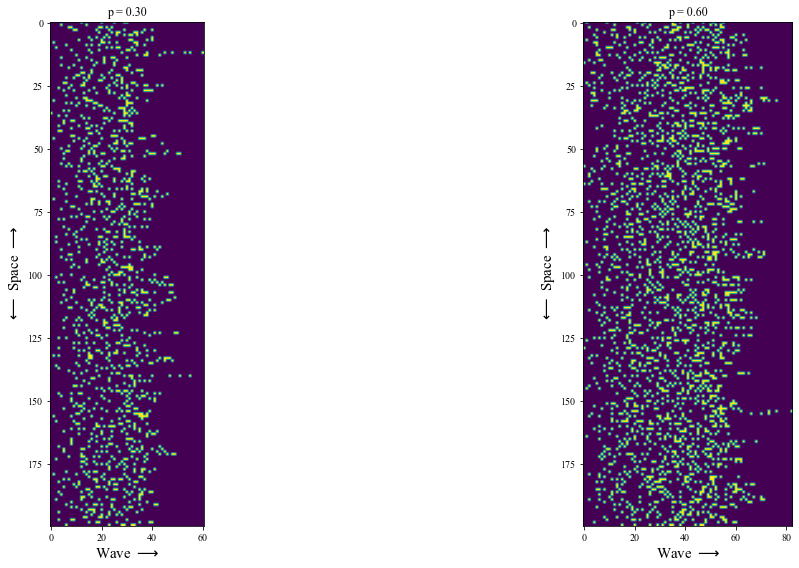

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=len(p_list), figsize=[15,10])
for i in np.arange(len(p_list)):
    X, Carrier_process = SBBS_update(X_list[i], n_iter=5, eps=0.5)
    # print(np.max(Carrier_process, axis=1)) # conserved quantity! 

    ax[i].imshow(X)
    ax[i].set_ylabel("$\longleftarrow$ Space $\longrightarrow$", fontsize=15);
    ax[i].set_xlabel("Wave $\longrightarrow$", fontsize=15);
    ax[i].set_title("p = %.2f" % p_list[i])

plt.subplots_adjust(left=0.01, right=0.9, bottom=0.1, top=0.8, wspace=0.4, hspace=0.2)
plt.savefig('MLR_20News_coeff_ex1.png', bbox_inches='tight')

In [99]:
p_list = [0.7]
X_list = []
for p in p_list:
    X = ini_config(shape=[1,50], p=p) # shape = [L, n]
    X_list.append(X)
    
# Phase transition at p=0.5, p \approx 0.7
# p<0.5 : subcritical with log n soliton length 
# p=0.5 : critical with \sqrt{n} soliton length
# 0.5<p<0.7 : supercritical with n soliton length but not giant 
# 0.7<p : ultracritical(?) Emergence of giant soliton

In [126]:
X = np.asarray([1]*10 + [0] * 5 + [1] * 5)
X = X[np.newaxis, :]

In [127]:
X.shape

(1, 20)

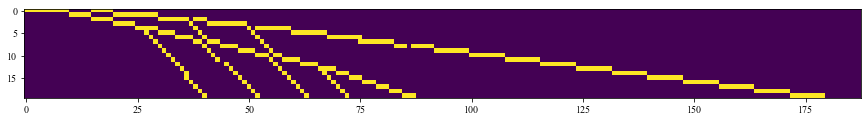

In [128]:
#X = X_list[0] # initial config
iter_total = 20
eps=0.01
X_stacked = []
X_stacked.append(X)
for t in np.arange(iter_total):
    X, Carrier_process = SBBS_update(X, n_iter=1, eps=eps)
    X_stacked.append(X.copy()) 
    
# pad in zeros
max_length = X_stacked[-1].shape[1]
X_array = np.zeros((iter_total, max_length))
for t in np.arange(iter_total):
    X1 = X_stacked[t]
    X_array[t,:X1.shape[1]] = X1

fig, ax = plt.subplots(nrows=1, ncols=len(p_list), figsize=[15,10])
ax.imshow(X_array)


In [61]:
X, Carrier_process = SBBS_update(X_list[0], n_iter=5, eps=0)

In [63]:
X, Carrier_process = SBBS_update(X, n_iter=5, eps=0)

In [64]:
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=len(p_list), figsize=[15,10])
for i in np.arange(len(p_list)):
    X, Carrier_process = SBBS_update(X_list[i], n_iter=5, eps=0.5)
    # print(np.max(Carrier_process, axis=1)) # conserved quantity! 

    ax[i].imshow(X)
    ax[i].set_ylabel("$\longleftarrow$ Space $\longrightarrow$", fontsize=15);
    ax[i].set_xlabel("Wave $\longrightarrow$", fontsize=15);
    ax[i].set_title("p = %.2f" % p_list[i])

plt.subplots_adjust(left=0.01, right=0.9, bottom=0.1, top=0.8, wspace=0.4, hspace=0.2)
plt.savefig('MLR_20News_coeff_ex1.png', bbox_inches='tight')

In [47]:
p_list = [0.3, 0.5]
X_list = []
for p in p_list:
    X = ini_config(shape=[1,100], p=p) # shape = [L, n]
    X_list.append(X)
    
# Phase transition at p=0.5, p \approx 0.7
# p<0.5 : subcritical with log n soliton length 
# p=0.5 : critical with \sqrt{n} soliton length
# 0.5<p<0.7 : supercritical with n soliton length but not giant 
# 0.7<p : ultracritical(?) Emergence of giant soliton

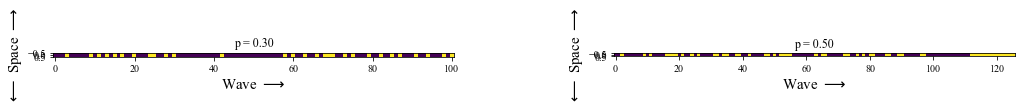

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=len(p_list), figsize=[15,10])
for i in np.arange(len(p_list)):
    X, Carrier_process = SBBS_update(X_list[i], n_iter=2)
    # print(np.max(Carrier_process, axis=1)) # conserved quantity! 

    ax[i].imshow(X)
    ax[i].set_ylabel("$\longleftarrow$ Space $\longrightarrow$", fontsize=15);
    ax[i].set_xlabel("Wave $\longrightarrow$", fontsize=15);
    ax[i].set_title("p = %.2f" % p_list[i])

plt.subplots_adjust(left=0.01, right=0.9, bottom=0.1, top=0.8, wspace=0.4, hspace=0.2)
plt.savefig('MLR_20News_coeff_ex1.png', bbox_inches='tight')